# 캘리포니아 주택 가격 예측 모델 만들기

## Import resource

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 데이터 가져오기

In [2]:
housing = pd.read_csv('datasets/housing.csv')

## 데이터 훑어보기

In [3]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [4]:
housing.tail(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

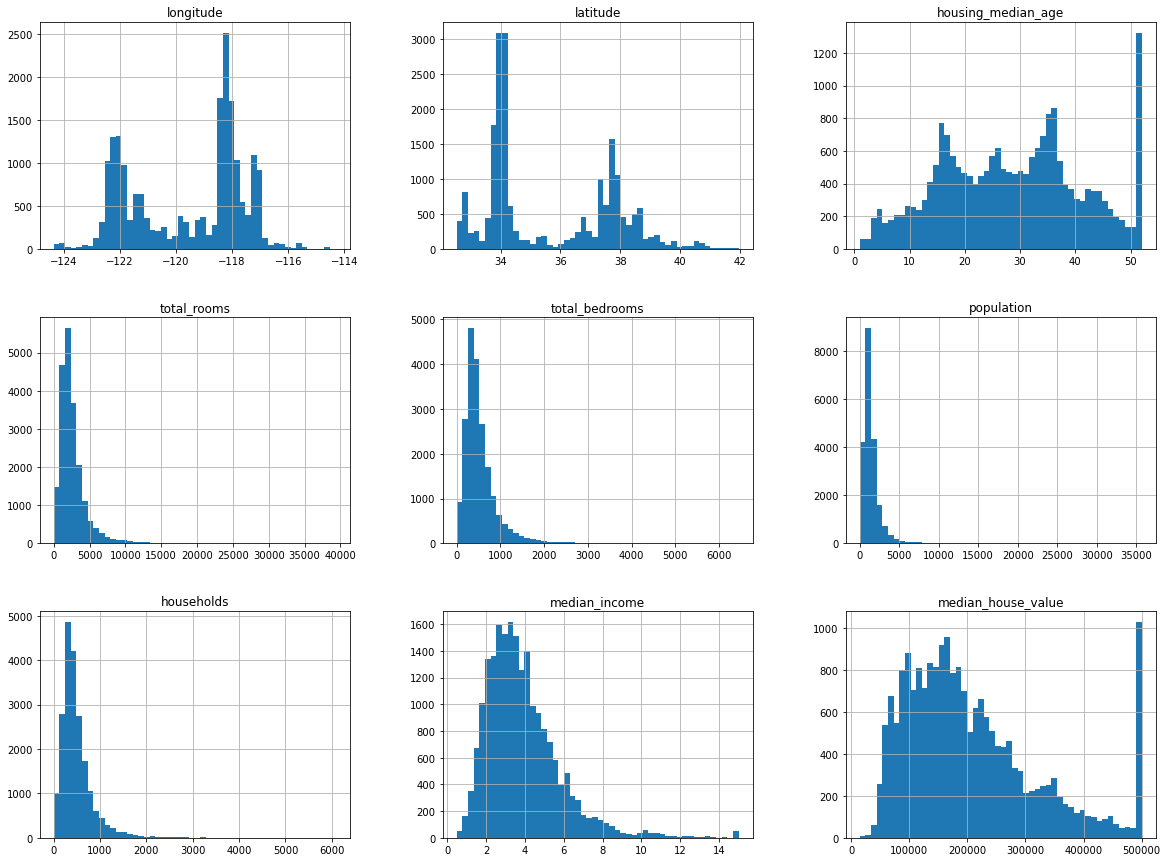

In [8]:
housing.hist(bins=50, figsize=(20, 15))

## 데이터 세트 분리

<AxesSubplot:>

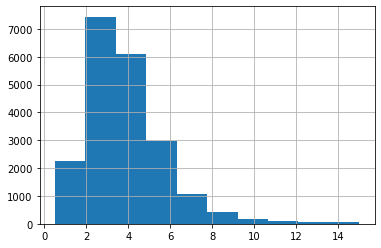

In [9]:
housing["median_income"].hist()

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf] , labels=[1, 2, 3, 4, 5])

In [11]:
# 1. 원본 housing data 기준 income_cat 분포
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [13]:
# 2. 무작위 추출 test data 기준 income_cat 분포
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set["income_cat"].value_counts()/len(test_set)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [14]:
# 3. 계층적 샘플링 test data 기준 income_cat 분포
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [15]:
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True) # Test set는 마지막에 사용

C:\Users\Playdata\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 데이터 탐색

In [16]:
housing = strat_train_set.copy() # 계층별 샘플링 된 train data만으로 탐색

### 지리적 데이터 시각화

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

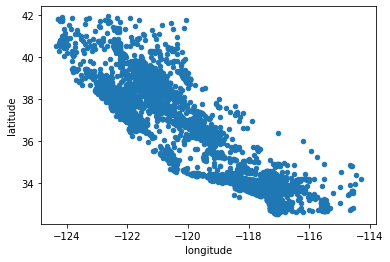

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

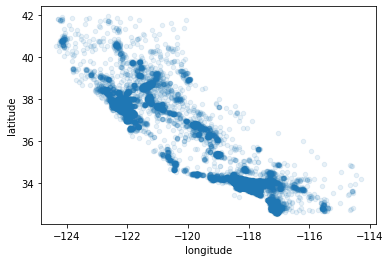

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

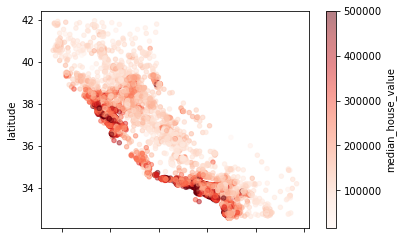

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
            c="median_house_value", cmap="Reds", colorbar=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

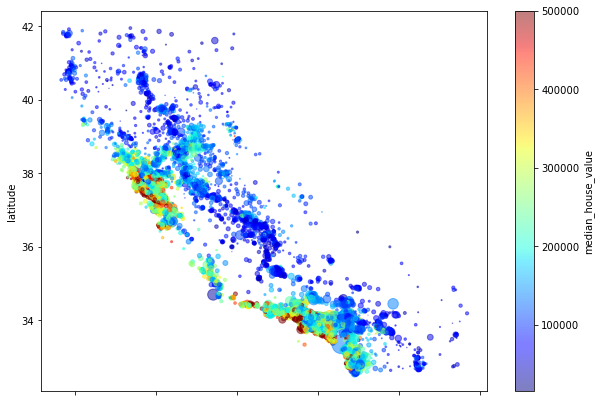

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
            c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True,
            s=housing["population"]/100, figsize=(10, 7))

- 해안이고 밀집지역의 주택가격이 높음

### 상관관계 조사

In [21]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

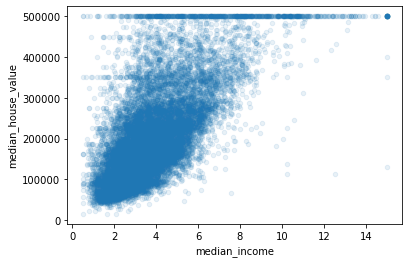

In [22]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

### 특성 조합으로 실험

In [23]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [24]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 데이터 전처리 (머신러닝 알고리즘을 위한 데이터 준비)

In [25]:
# 특성값과 레이블 분리
housing = strat_train_set.drop("median_house_value", axis=1)  # 특성값
housing_labels = strat_train_set["median_house_value"].copy() # 레이블

### 데이터 전처리(1) - 결손값 처리

In [26]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [27]:
# option 1
sample_incomplete_rows.dropna(subset=["total_bedrooms"], axis=0) # na가 있는 행을 삭제

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [28]:
# option 2
sample_incomplete_rows.drop("total_bedrooms", axis=1) # 해당 열을 삭제

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [29]:
# option 3
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [31]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [32]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [34]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [35]:
X = imputer.transform(housing_num)

In [36]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [37]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


### 데이터 전처리(2) - 데이터 인코딩

In [38]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


#### 1) 레이블 인코딩

In [40]:
# pandas

In [41]:
pd.factorize(housing["ocean_proximity"])

(array([0, 0, 1, ..., 2, 0, 3], dtype=int64),
 Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [42]:
# scikit-learn

In [43]:
from sklearn.preprocessing import OrdinalEncoder #LabelEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

#### 2) 원-핫 인코딩

In [44]:
# pandas

In [45]:
pd.get_dummies(housing_cat)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,1,0,0,0,0
18632,1,0,0,0,0
14650,0,0,0,0,1
3230,0,1,0,0,0
3555,1,0,0,0,0
...,...,...,...,...,...
6563,0,1,0,0,0
12053,0,1,0,0,0
13908,0,1,0,0,0
11159,1,0,0,0,0


In [46]:
# scikit-learn

In [47]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
housing_cat_encoded = onehot_encoder.fit_transform(housing_cat)
housing_cat_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [48]:
housing_cat_encoded.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [49]:
onehot_encoder = OneHotEncoder(sparse=False)
housing_cat_encoded = onehot_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [50]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 데이터 전처리(3) - 특성 스케일링

In [51]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_standardized = std_scaler.fit_transform(housing_num)
housing_num_standardized

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.63621141,
        -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.99833135,
        -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.43363936,
        -0.0933178 , -0.5320456 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.60790363,
         0.71315642, -0.3167053 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.05717804,
        -0.37545069,  0.09812139],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.13515931,
         0.3777909 , -0.15779865]])

### 데이터 전처리(4) - 변환 파이프라인

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, housholds_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, housholds_ix]
        population_per_household = X[:, population_ix] / X[:, housholds_ix]        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [63]:
#수치형 특성 전처리
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

[[-121.89     37.29     38.     ...  710.      339.        2.7042]
 [-121.93     37.05     14.     ...  306.      113.        6.4214]
 [-117.2      32.77     31.     ...  936.      462.        2.8621]
 ...
 [-116.4      34.09      9.     ... 2098.      765.        3.2723]
 [-118.01     33.82     31.     ... 1356.      356.        4.0625]
 [-122.45     37.77     52.     ... 1269.      639.        3.575 ]]
<class 'numpy.ndarray'>


In [64]:
# 범주형 특성 전처리
# OneHotEncoder

In [65]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
                        ("num", num_pipeline, num_attribs),
                        ("cat", OneHotEncoder(), cat_attribs)
                ])
housing_prepared = full_pipeline.fit_transform(housing)

[[-121.89     37.29     38.     ...  710.      339.        2.7042]
 [-121.93     37.05     14.     ...  306.      113.        6.4214]
 [-117.2      32.77     31.     ...  936.      462.        2.8621]
 ...
 [-116.4      34.09      9.     ... 2098.      765.        3.2723]
 [-118.01     33.82     31.     ... 1356.      356.        4.0625]
 [-122.45     37.77     52.     ... 1269.      639.        3.575 ]]
<class 'numpy.ndarray'>


In [111]:
housing_prepared.shape, housing.shape

((16512, 16), (16512, 9))

## 모델 선택과 훈련

### 선형회귀 모델

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [69]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [79]:
# sample data에 대해서 예측
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]

some_data_prepared = full_pipeline.transform(some_data)
sample_predictions = lin_reg.predict(some_data_prepared)
print("예측:", predicted)
print("정답:", some_labels)

[[-1.2189e+02  3.7290e+01  3.8000e+01  1.5680e+03  3.5100e+02  7.1000e+02
   3.3900e+02  2.7042e+00]
 [-1.2193e+02  3.7050e+01  1.4000e+01  6.7900e+02  1.0800e+02  3.0600e+02
   1.1300e+02  6.4214e+00]
 [-1.1720e+02  3.2770e+01  3.1000e+01  1.9520e+03  4.7100e+02  9.3600e+02
   4.6200e+02  2.8621e+00]
 [-1.1961e+02  3.6310e+01  2.5000e+01  1.8470e+03  3.7100e+02  1.4600e+03
   3.5300e+02  1.8839e+00]
 [-1.1859e+02  3.4230e+01  1.7000e+01  6.5920e+03  1.5250e+03  4.4590e+03
   1.4630e+03  3.0347e+00]]
<class 'numpy.ndarray'>
예측: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
정답: 17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


In [88]:
# 전체 훈련 데이터에 대해서 예측
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse
# lin_rmse = np.sqrt(lin_mse)
# lin_rmse

4709829587.971121

In [85]:
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

68628.19819848923

In [86]:
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

In [90]:
r2_score(housing_labels, housing_predictions)

0.6481624842804428

In [91]:
lin_reg.score(housing_prepared, housing_labels)

0.6481624842804428

### 결정 트리 모델

In [92]:
from sklearn.tree import DecisionTreeRegressor # DecisionTreeClassifier

In [93]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [95]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_rmse

0.0

In [97]:
tree_reg.score(housing_prepared, housing_labels)

1.0

### 교차 검증을 사용한 평가

In [98]:
from sklearn.model_selection import cross_val_score

In [104]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
               scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) 
print("Tree Model Scores :", scores)
print("RMSE 값 10개 : ", tree_rmse_scores)
print("평균:", tree_rmse_scores.mean())

Tree Model Scores : [-4.92724492e+09 -4.46961291e+09 -5.24647900e+09 -5.00679914e+09
 -5.05746872e+09 -5.71311365e+09 -4.93686969e+09 -4.93838343e+09
 -5.68016653e+09 -5.07394900e+09]
RMSE 값 10개 :  [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균: 71407.68766037929


In [103]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
               scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores) 
print("Linear Regression Model Scores :", scores)
print("RMSE 값 10개 : ", lin_rmse_scores)
print("평균:", lin_rmse_scores.mean())

Linear Regression Model Scores : [-4.45993415e+09 -4.48365741e+09 -4.94883441e+09 -5.58600340e+09
 -4.62823518e+09 -5.06856312e+09 -4.22105290e+09 -4.66237845e+09
 -5.11981974e+09 -4.57856587e+09]
RMSE 값 10개 :  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균: 69052.46136345083


### 랜덤 포레스트 모델

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [109]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
forest_rmse

18603.515021376355

In [110]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores) 
print("Linear Regression Model Scores :", scores)
print("RMSE 값 10개 : ", forest_rmse_scores)
print("평균:", forest_rmse_scores.mean())

Linear Regression Model Scores : [-2.45221095e+09 -2.25263305e+09 -2.50290361e+09 -2.73793500e+09
 -2.43131774e+09 -2.85651542e+09 -2.36534413e+09 -2.26440249e+09
 -2.86119155e+09 -2.50215900e+09]
RMSE 값 10개 :  [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
평균: 50182.303100336096


## 모델 세부 튜닝

### 그리드 탐색

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

Wall time: 38.7 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [121]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [122]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [117]:
cvres = grid_search.cv_results_ 

In [120]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

### 랜덤 탐색

In [123]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [127]:
param_distribs = {
    'n_estimators' : randint(low=1, high=200),
    'max_features' : randint(low=1, high=8)
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distribs, n_iter=10, cv=5, 
                                scoring="neg_mean_squared_error", random_state=42, n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FAC8137910>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FAC7EC5F10>},
                   random_state=42, scoring='neg_mean_squared_error')

In [128]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


In [130]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [134]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [150]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_hhold"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_attribs = cat_encoder.categories_[0]
cat_attribs = list(cat_attribs)
attributes = num_attribs + extra_attribs + cat_attribs
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_hhold',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [154]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_hhold'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

## 예측과 성능 평가

In [155]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse

(참고) 전처리와 예측을 포함한 전체 파이프라인

In [ ]:
full_pipeline_with_predictor = Pipeline([
                ("preparation", full_pipeline),  ## 전처리기
                ("linear", LinearRegression())   ## 예측기(모델)
])
full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

In [169]:
full_pipeline_with_predictor = Pipeline([
                ("preparation", full_pipeline),  ## 전처리기
                ("final", final_model)   ## 예측기(모델)
])
full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

[[-121.89     37.29     38.     ...  710.      339.        2.7042]
 [-121.93     37.05     14.     ...  306.      113.        6.4214]
 [-117.2      32.77     31.     ...  936.      462.        2.8621]
 ...
 [-116.4      34.09      9.     ... 2098.      765.        3.2723]
 [-118.01     33.82     31.     ... 1356.      356.        4.0625]
 [-122.45     37.77     52.     ... 1269.      639.        3.575 ]]
<class 'numpy.ndarray'>
[[-1.2189e+02  3.7290e+01  3.8000e+01  1.5680e+03  3.5100e+02  7.1000e+02
   3.3900e+02  2.7042e+00]
 [-1.2193e+02  3.7050e+01  1.4000e+01  6.7900e+02  1.0800e+02  3.0600e+02
   1.1300e+02  6.4214e+00]
 [-1.1720e+02  3.2770e+01  3.1000e+01  1.9520e+03  4.7100e+02  9.3600e+02
   4.6200e+02  2.8621e+00]
 [-1.1961e+02  3.6310e+01  2.5000e+01  1.8470e+03  3.7100e+02  1.4600e+03
   3.5300e+02  1.8839e+00]
 [-1.1859e+02  3.4230e+01  1.7000e+01  6.5920e+03  1.5250e+03  4.4590e+03
   1.4630e+03  3.0347e+00]]
<class 'numpy.ndarray'>


array([277026.66666667, 333836.66666667, 210290.        ,  48350.        ,
       239296.66666667])

## joblib를 사용한 모델 저장

In [164]:
my_model = full_pipeline_with_predictor

In [165]:
import joblib
joblib.dump(my_model, "my_model.pkl")

['my_model.pkl']

In [167]:
!dir my_model.pkl

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2EC3-9F2C

 C:\Users\Playdata\Documents\Machine Learning\workshop 디렉터리

2022-01-25  오전 10:19             4,457 my_model.pkl
               1개 파일               4,457 바이트
               0개 디렉터리  133,971,611,648 바이트 남음
